In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score, r2_score, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, roc_curve 
from sklearn import metrics

# EDA

In [2]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# display dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# getting to know the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# any missing values?
df.isnull().sum() 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# any missing values?
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
# Check all the unique values for all the columns having less than 100 unique values
# Avoiding the value prints for those columns which have large number of unique values like zipcode or counties etc.

for col in df.columns:
    if df[col].nunique()<100:
        print(col, sorted(df[col].unique()), '\n')

Geography ['France', 'Germany', 'Spain'] 

Gender ['Female', 'Male'] 

Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 92] 

Tenure [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

NumOfProducts [1, 2, 3, 4] 

HasCrCard [0, 1] 

IsActiveMember [0, 1] 

Exited [0, 1] 



In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# FEATURE ENGINEERING

In [8]:
# Dropping unnecessary columns - feature engineering
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Check data by printing first few rows
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# DATA EXPLORATION

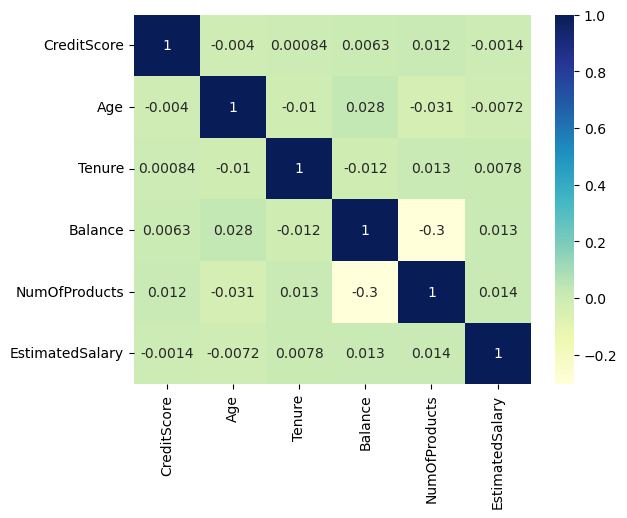

In [9]:
num_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
corr_matrix = df[num_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()


The Pearson correlation coefficient map indicates that there are no significant correlations between the numerical variables, which means that multicollinearity is not a concern.

## Correlation between numerical variables and Exited

In [10]:
temp = num_cols.copy()
temp.append('Exited')

<AxesSubplot: >

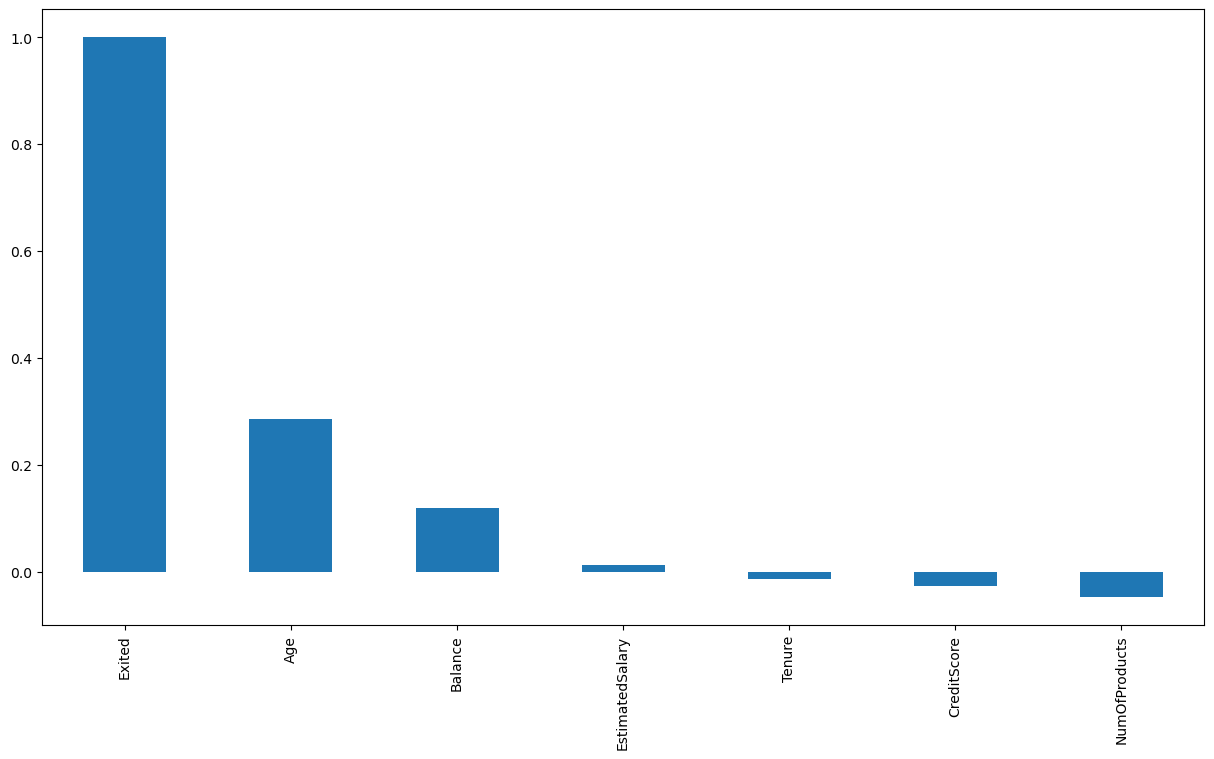

In [11]:
corr_df = df[temp]
corr_df = pd.get_dummies(corr_df)
plt.figure(figsize=(15,8))
corr_df.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

We can see that Age and Balance are positively related to Exited, whereas the other features show little correlation.

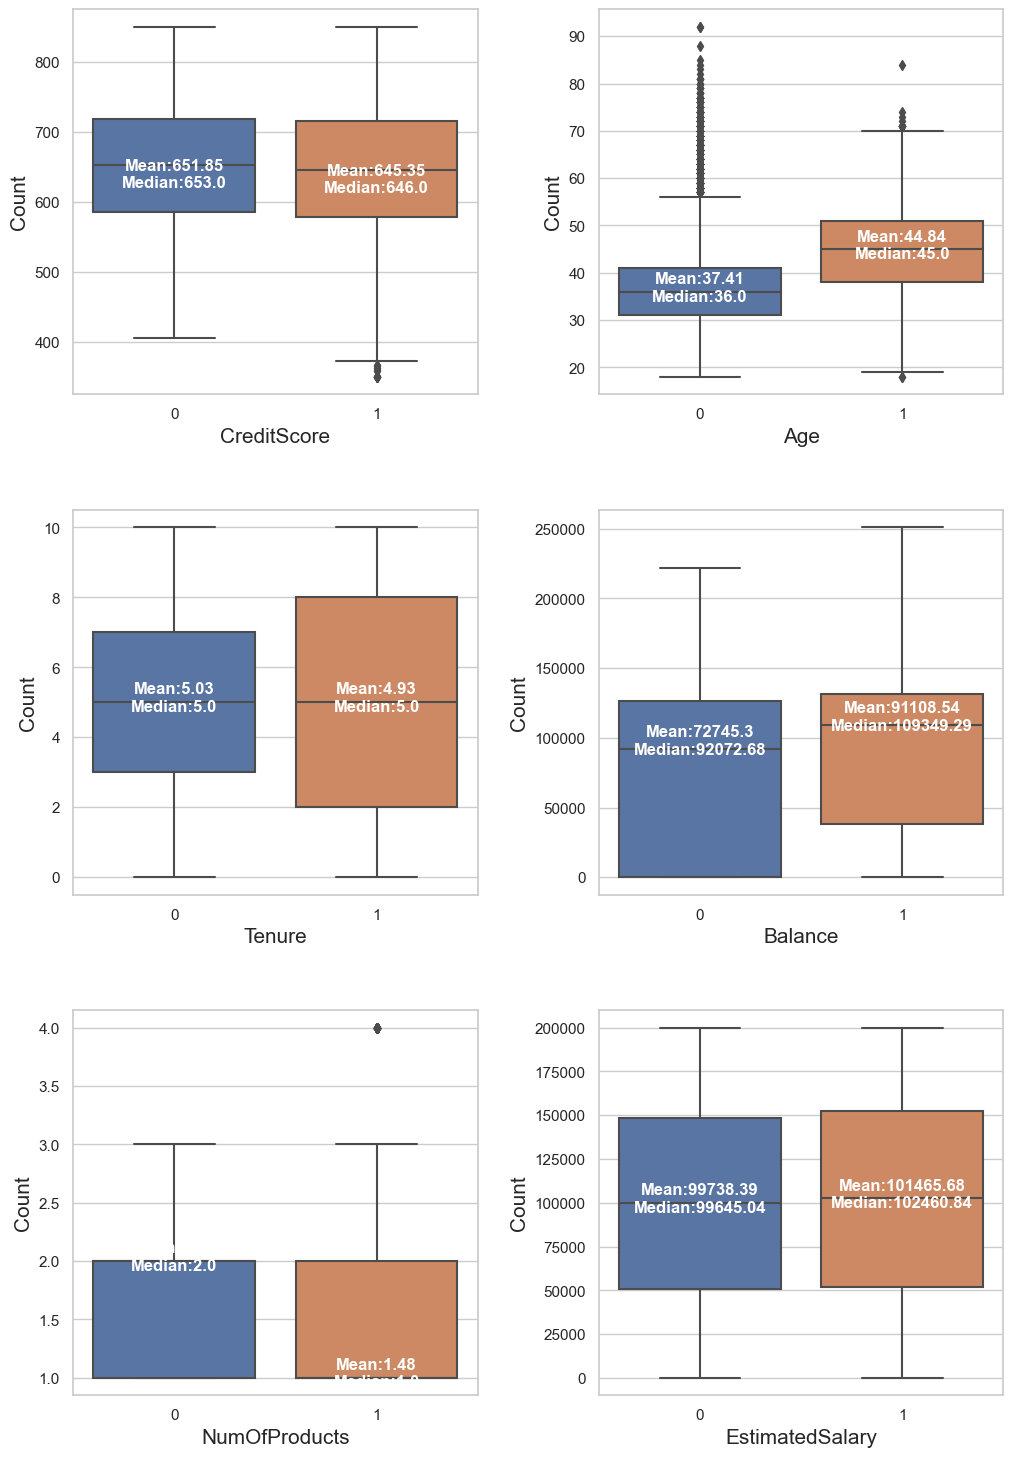

In [12]:
# Charting Continuous Numerical Variables

# Declaring all the columns which will be used for creation of box plots
to_plot = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

# Creating box plots, with mean and median printed
sns.set(style="whitegrid")
fig, axes = plt.subplots(ncols=2, nrows = 3, figsize = (12,18))
plt.subplots_adjust(wspace=0.3, hspace=0.3) # adjust the space between subplots
i = 0
for row in range(3):
    for col in range(2):
        g = sns.boxplot(x='Exited',y=to_plot[i],data=df, ax=axes[row][col])
        g.set_xlabel(to_plot[i],fontsize=15)
        g.set_ylabel("Count",fontsize=15)
        i += 1
        means = df.groupby('Exited')[to_plot[i-1]].mean()
        medians = df.groupby('Exited')[to_plot[i-1]].median()
        vertical_offset = df[to_plot[i-1]].mean() *.05
        for xtick in g.get_xticks():
            g.text(xtick,medians[xtick]-vertical_offset,"Mean:"+str(round(means[xtick],2))+'\n'+"Median:"+str(round(medians[xtick],2)), horizontalalignment='center', color='w', weight='semibold')

plt.show(fig)


We believe that the outliers are valid data points and are part of the actual distribution. It is reasonable to expect that some customers may fall outside the typical age range of 20 to 55 years old and may still have bank accounts. Similarly, it is also possible that some customers may have low CreditScore or a high number of bank products. Therefore, we do not want to remove these outliers from the data.

We can see Age has many outliers. Let's check the distribution of Age for churned and non-churned people.

C:\Users\SANKA NAGA NITESH\AppData\Local\Temp\ipykernel_5968\860583678.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Exited'] == 0]['Age'],
C:\Users\SANKA NAGA NITESH\AppData\Local\Temp\ipykernel_5968\860583678.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[df['Ex

Text(0.5, 1.0, 'Churn')

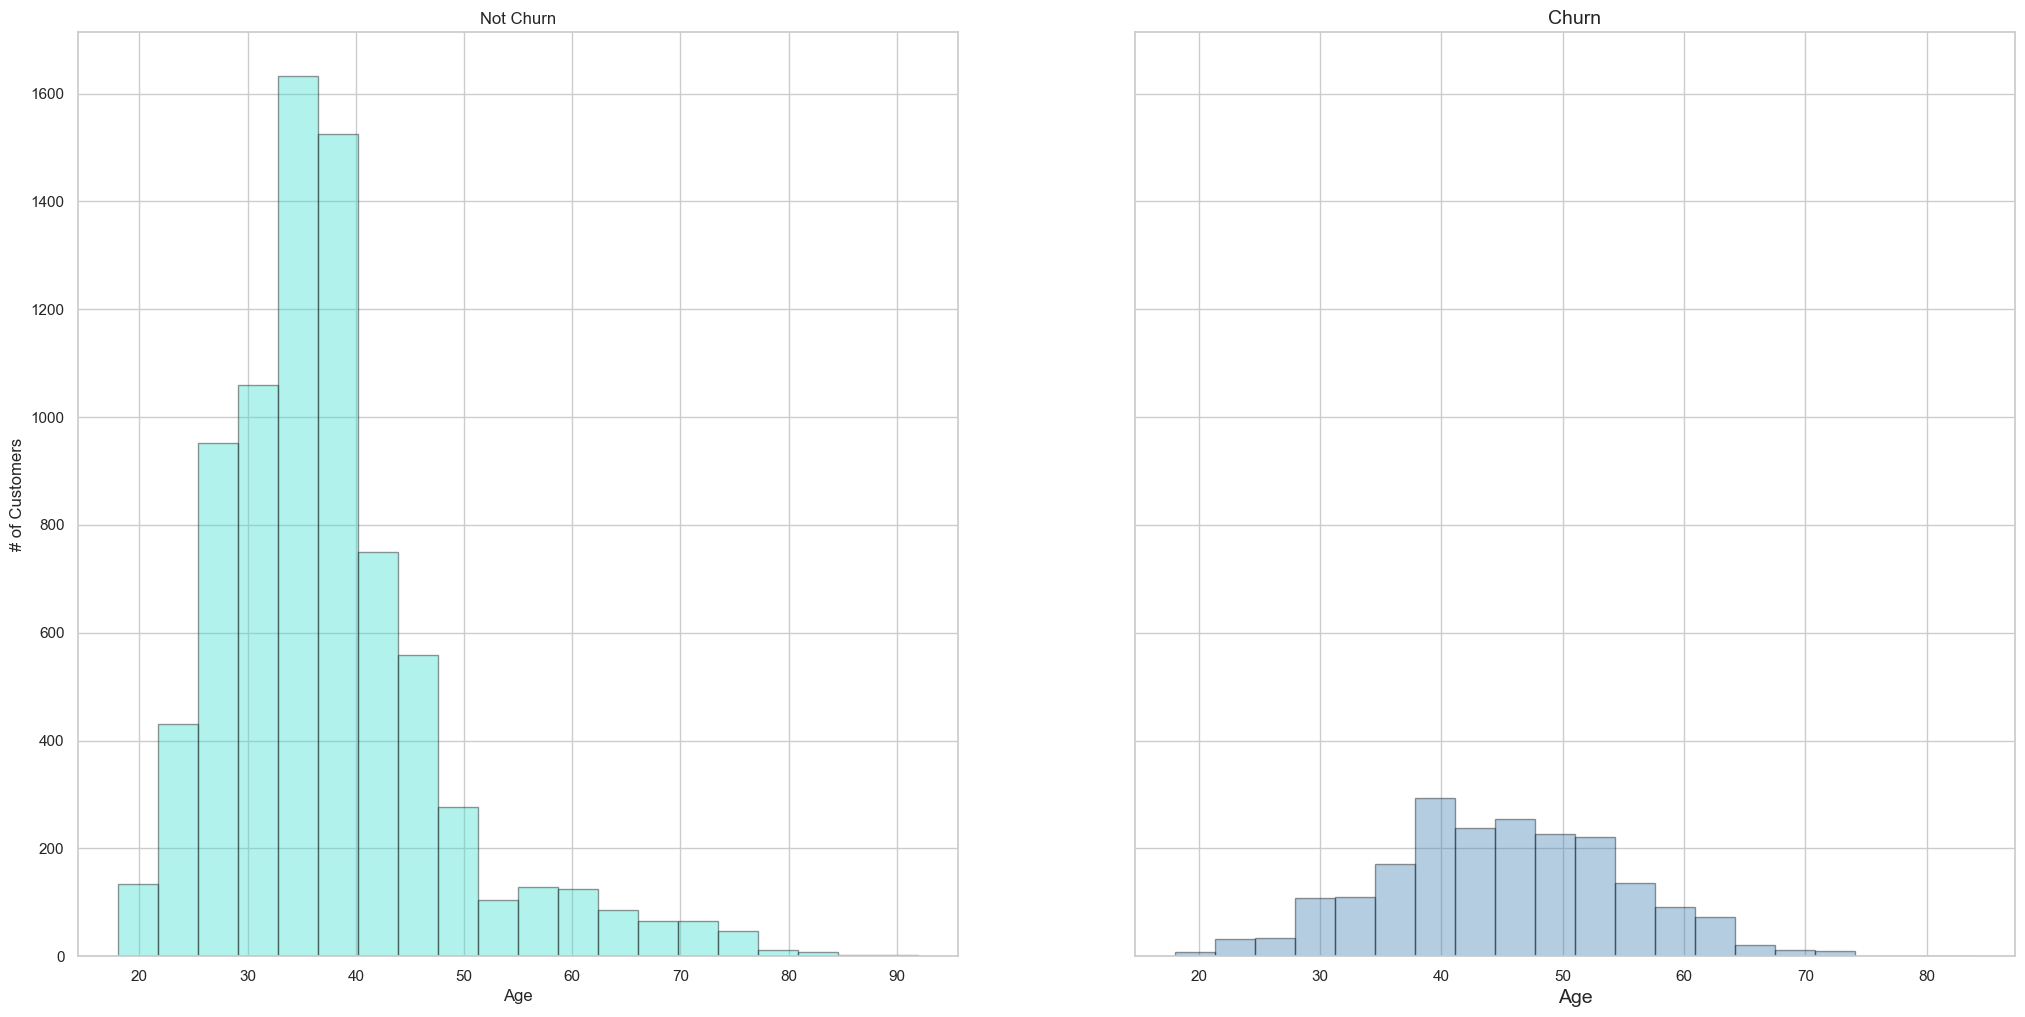

In [13]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize = [25,12])

ax = sns.distplot(df[df['Exited'] == 0]['Age'],
                   hist=True, kde=False,
                   bins=20, color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Age')
ax.set_title('Not Churn')

ax = sns.distplot(df[df['Exited'] == 1]['Age'],
                   hist=True, kde=False,
                   bins=20, color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Age',size = 14)
ax.set_title('Churn',size = 14)

The histograms reveal that the distribution of Age for churned and non-churned individuals differs significantly. The churned population has a much higher proportion of individuals over the age of 50, while the non-churned population is primarily concentrated between the ages of 25 to 45. People over the age of 55 constitute only a small proportion of the non-churned population, whereas they are much more prevalent among the churned population. This finding provides a plausible explanation for the numerous outliers observed in the boxplot. Moreover, it is consistent with our previous observation that Age and Exited are positively correlated, as shown in the correlation plot.

NOTE: The dataset is imbalanced, with a much larger number of non-churned instances compared to the churned ones. This suggests that the models trained on this dataset may have a higher tendency to classify instances as non-churned, leading to a higher rate of false negatives.

In [14]:
# Count the number of churned and non-churned customers
counts = df['Exited'].value_counts()


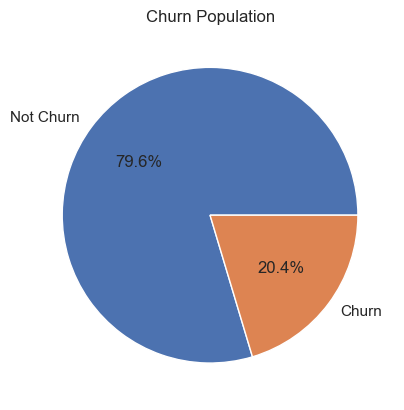

In [15]:
# Plot a pie chart of the counts
plt.pie(counts, labels=['Not Churn', 'Churn'], autopct='%1.1f%%')
plt.title('Churn Population')
plt.show()

It shows a mild degree of imbalance. We will use stratified sampling when splitting our train and test sets to avoid having too many negatives in our training set.

## Correlation between categorical variables and Exited

<AxesSubplot: >

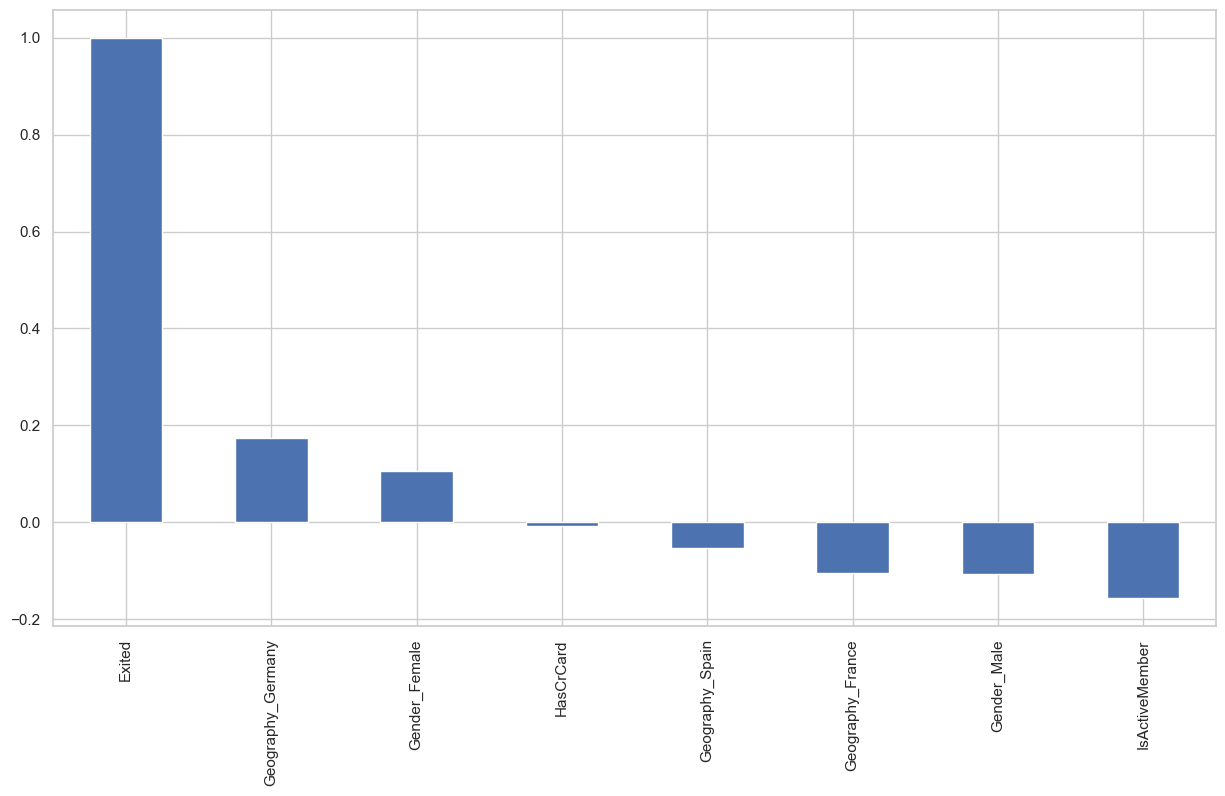

In [16]:
# Correlation between categorical variables and Exited

corr_df = df[['Geography', 'Gender', 'HasCrCard', 'IsActiveMember','Exited']]
corr_df = pd.get_dummies(corr_df)
plt.figure(figsize=(15,8))
corr_df.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

The correlation plot illustrates the relationship between the Exited variable and other numerical variables. The variables Geography_Germany and Gender_Female display a positive correlation with Exited, while the variables IsActiveMember, Gender_Male, Geography_France, and Geography_Spain are negatively correlated with Exited. Additionally, the variable HasCrCard demonstrates little correlation with Exited.

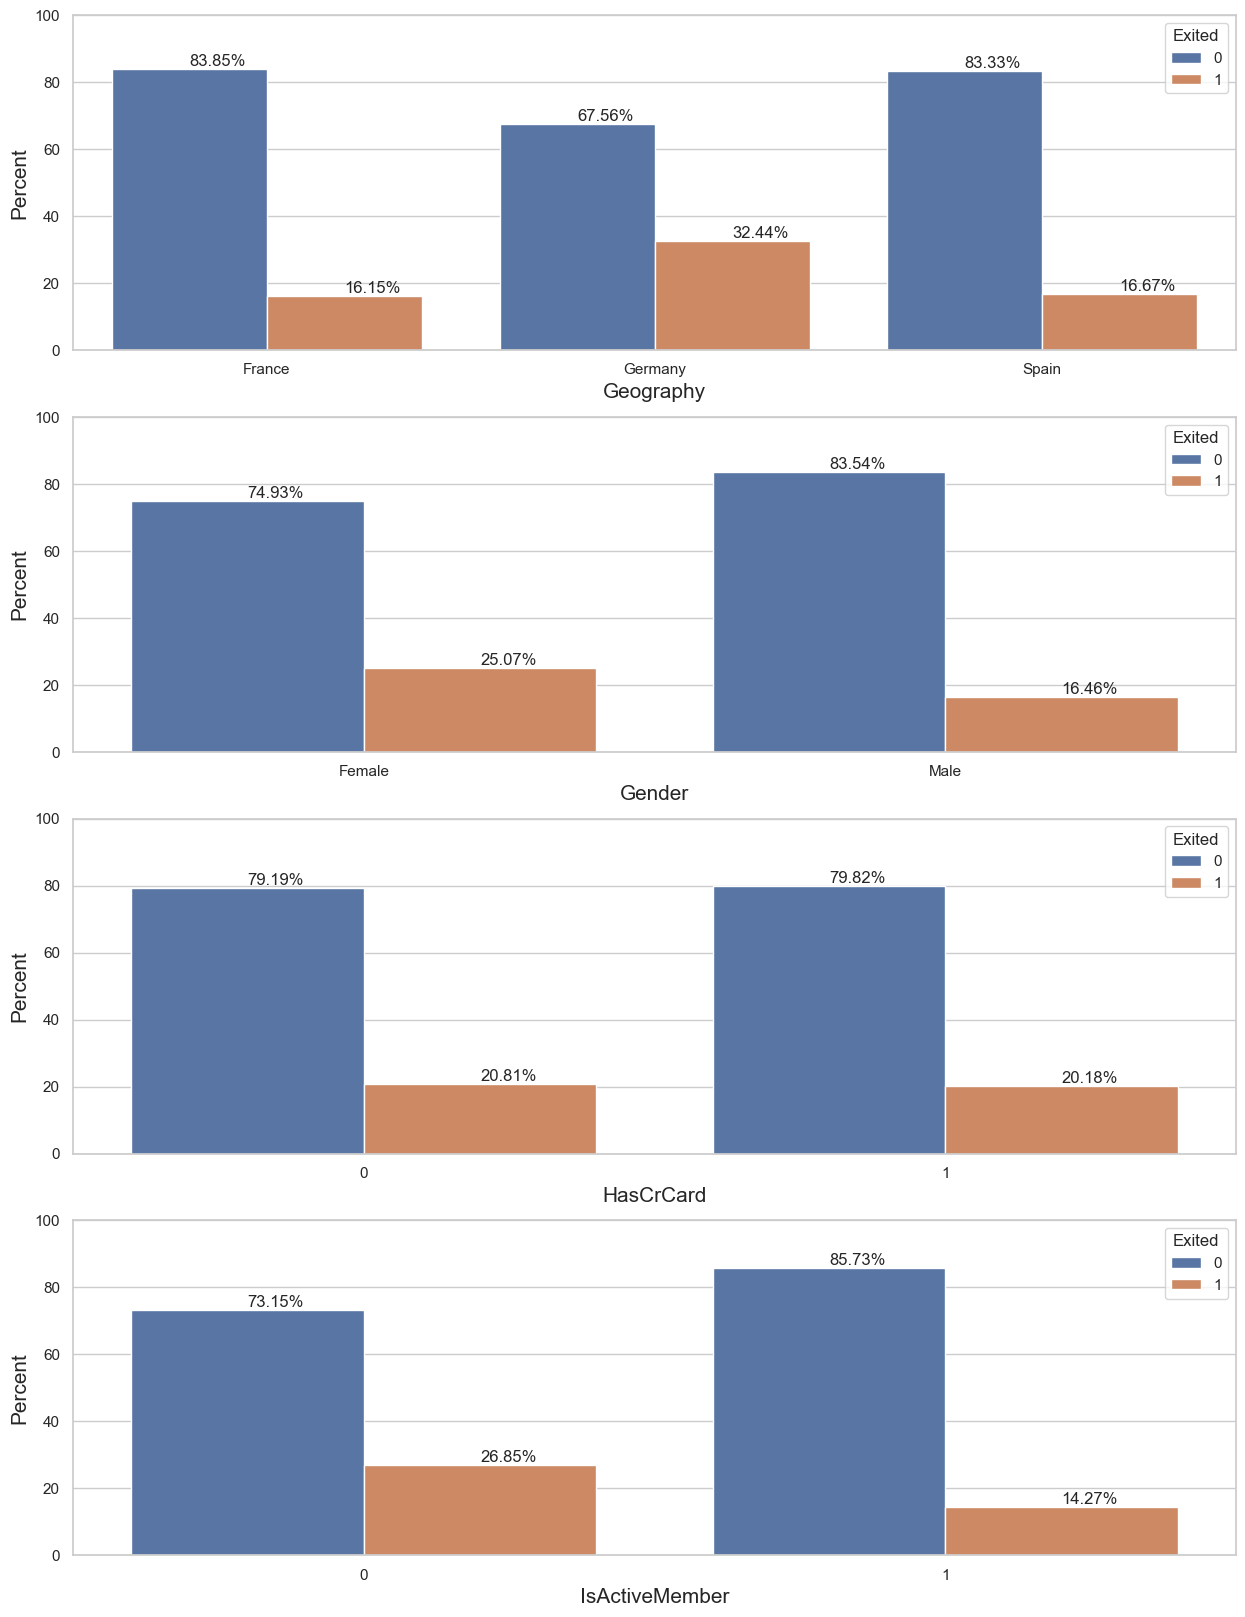

In [17]:
# Charting Categorical Variables


# Declaring all the columns which will be used for creation of box plots
to_plot = ['Geography','Gender','HasCrCard','IsActiveMember']

# Creating bar charts, with percentages printed
sns.set(style="whitegrid", color_codes=True)
fig, axes = plt.subplots(ncols=1, nrows = len(to_plot), figsize = (15,5*len(to_plot)))
i = 0
for x in to_plot:
    d = df.groupby(x)['Exited'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    g = sns.barplot(x=x,y='Percentage',hue='Exited', data=d, ax=axes[i])     # Create bar chart
    g.set_ylim(0,100)
    g.set_xlabel(x,fontsize=15)
    g.set_ylabel("Percent",fontsize=15)
    i += 1
    for p in g.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() + p.get_width()/2
        txt_y = p.get_height()
        g.text(txt_x,txt_y+1,txt)        # Printing percentages on the bars


plt.show(fig)

The findings from the analysis of different variables are consistent with the correlation plot presented earlier. For instance, the correlation between Geography_Germany and Exited is positive, indicating that customers from Germany are more likely to churn than those from France or Spain. Similarly, the positive correlation between Gender_Female and Exited implies that female customers are more likely to churn than male customers. On the other hand, the correlation between HasCrCard and Exited does not show any clear pattern. The correlation between IsActiveMember and Exited suggests that non-active customers are more likely to churn than active customers. Overall, these findings align with the results from the correlation plot, highlighting the importance of these variables in predicting customer churn.

# MODEL DATA PREPROCESSING

In [18]:
# Encoding the categorical variables gender and geography
encode = LabelEncoder()
df['Gender'] = encode.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# displaying the dataset
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [19]:
# Defining the test and train
X = df.drop('Exited', axis=1) # removing the dependent variable 
y = df['Exited'] # having only the independent variable

# Splitting the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [20]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MODELLING

## MODEL 1 - LOGISTIC REGRESSION

In [21]:
# fitting logistic regression model
logit_model = LogisticRegression(max_iter=1000, random_state=42)
logit_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [22]:
# Evaluating the performance of Model 1 - logistic Regression
logit_model_preds = logit_model.predict(X_test)
logit_model_confusion_matrix = confusion_matrix(y_test, logit_model_preds)
logit_model_accuracy = accuracy_score(y_test, logit_model_preds)
logit_model_precision = precision_score(y_test, logit_model_preds)
logit_model_recall = recall_score(y_test, logit_model_preds)
logit_model_f1score = f1_score(y_test, logit_model_preds)
logit_model_roc_auc = roc_auc_score(y_test, logit_model_preds)

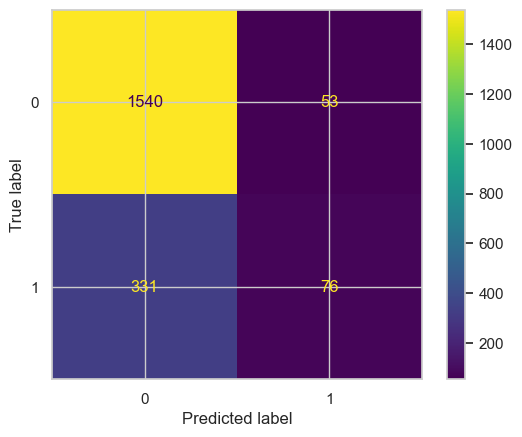

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, logit_model.predict(X_test))
plt.show()

In [24]:
print("Logistic Regression Accuracy:", logit_model_accuracy)
print("Logistic Regression Precision:", logit_model_precision)
print("Logistic Regression Recall:", logit_model_recall)
print("Logistic Regression F1 Score:", logit_model_f1score)
print("Logistic Regression ROC AUC:", logit_model_roc_auc)

Logistic Regression Accuracy: 0.808
Logistic Regression Precision: 0.5891472868217055
Logistic Regression Recall: 0.18673218673218672
Logistic Regression F1 Score: 0.2835820895522388
Logistic Regression ROC AUC: 0.5767308140189497


Although our model's accuracy score is high, the recall score is very low, which indicates that the model is misclassifying a significant number of users who would actually churn as non-churners. In churn problems, it is crucial to identify as many potential churners as possible, so we need to improve our recall score. 

## MODEL 2 - SVM

In [27]:
# fitting an SVM model
svm_model = SVC(kernel='rbf',probability=True, C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [28]:
# Evaluate performance of SVM model
svm_model_preds = svm_model.predict(X_test)
svm_model_confusion_matrix = confusion_matrix(y_test, svm_model_preds)
svm_model_accuracy = accuracy_score(y_test, svm_model_preds)
svm_model_precision = precision_score(y_test, svm_model_preds)
svm_model_recall = recall_score(y_test, svm_model_preds)
svm_model_f1score = f1_score(y_test, svm_model_preds)
svm_model_roc_auc = roc_auc_score(y_test, svm_model_preds)

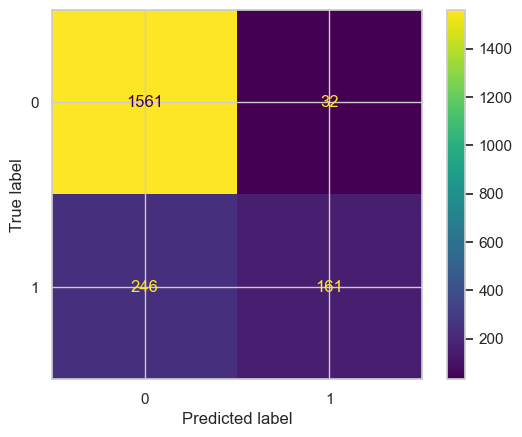

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, svm_model.predict(X_test))
plt.show()

In [30]:
print("SVM Accuracy:", svm_model_accuracy)
print("SVM Precision:", svm_model_precision)
print("SVM Recall:", svm_model_recall)
print("SVM F1 Score:", svm_model_f1score)
print("SVM ROC AUC:", svm_model_roc_auc)

SVM Accuracy: 0.861
SVM Precision: 0.8341968911917098
SVM Recall: 0.3955773955773956
SVM F1 Score: 0.5366666666666667
SVM ROC AUC: 0.6877447555413657


SVM model has an accuracy of 0.861 which means that 86.1% of the predictions made by the model are correct. However, it has a recall of only 0.396 which means that the model is only correctly identifying 39.6% of the customers who are actually likely to churn. This suggests that the model may not be effective in identifying all the potential churners and might require some tuning or adjustment to improve its performance.

## MODEL 3 - RANDOM FOREST

In [31]:
# fitting random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
# Evaluate performance of random forest model
rf_model_preds = rf_model.predict(X_test)
rf_model_confusion_matrix = confusion_matrix(y_test, rf_model_preds)
rf_model_accuracy = accuracy_score(y_test, rf_model_preds)
rf_model_precision = precision_score(y_test, rf_model_preds)
rf_model_recall = recall_score(y_test, rf_model_preds)
rf_model_f1score = f1_score(y_test, rf_model_preds)
rf_model_roc_auc = roc_auc_score(y_test, rf_model_preds)



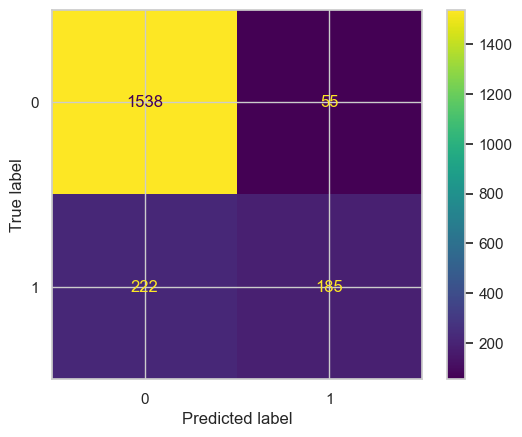

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_model.predict(X_test))
plt.show()

In [34]:
print("Random Forest Accuracy:", rf_model_accuracy)
print("Random Forest Precision:", rf_model_precision)
print("Random Forest Recall:", rf_model_recall)
print("Random Forest F1 Score:", rf_model_f1score)
print("Random Forest ROC AUC:", rf_model_roc_auc)


Random Forest Accuracy: 0.8615
Random Forest Precision: 0.7708333333333334
Random Forest Recall: 0.45454545454545453
Random Forest F1 Score: 0.571870170015456
Random Forest ROC AUC: 0.7100097015351252


Based on the output of the Random Forest model, the accuracy of the model is 0.8615, which indicates that the model correctly predicted the churn status of 86.15% of the customers. However, the recall of the model is 0.4545, which indicates that the model correctly identified only 45.45% of the customers who actually churned. This means that the model has a high number of false negatives, i.e., customers who actually churned were not correctly identified by the model. Therefore, the model's performance may not be optimal for identifying customers who are likely to churn.

## MODEL 4 - XG BOOST

In [35]:
from xgboost import XGBClassifier

# fitting xg boost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [36]:
# Evaluate performance of random forest model
xgb_model_preds = xgb_model.predict(X_test)
xgb_model_confusion_matrix = confusion_matrix(y_test, xgb_model_preds)
xgb_model_accuracy = accuracy_score(y_test, xgb_model_preds)
xgb_model_precision = precision_score(y_test, xgb_model_preds)
xgb_model_recall = recall_score(y_test, xgb_model_preds)
xgb_model_f1score = f1_score(y_test, xgb_model_preds)
xgb_model_roc_auc = roc_auc_score(y_test, xgb_model_preds)

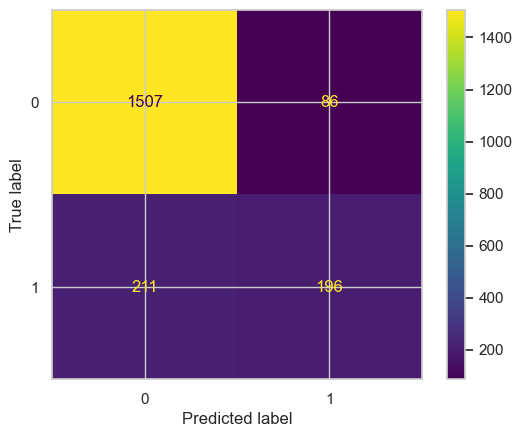

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, xgb_model.predict(X_test))
plt.show()

In [38]:
print("XG Boost Accuracy:", xgb_model_accuracy)
print("XG Boost Precision:", xgb_model_precision)
print("XG Boost Recall:", xgb_model_recall)
print("XG Boost F1 Score:", xgb_model_f1score)
print("XG Boost ROC AUC:", xgb_model_roc_auc)

XG Boost Accuracy: 0.8515
XG Boost Precision: 0.6950354609929078
XG Boost Recall: 0.48157248157248156
XG Boost F1 Score: 0.5689404934687953
XG Boost ROC AUC: 0.7137931459965358


Based on the output, the XG Boost model has an accuracy of 0.8515 which means it correctly classified 85.15% of the samples in the test set. The precision of the model is 0.695, which means out of all the predicted positives, only 69.5% are actually positive. The recall of the model is 0.4815 which means out of all the actual positives, the model correctly classified only 48.15%. The F1 score of the model is 0.5689 which is the harmonic mean of precision and recall. Finally, the ROC AUC score is 0.7137 which measures the ability of the model to distinguish between the positive and negative classes. 

Recall is the most important metric when it comes to identifying the best model for churn. Based on the recall data, the xgboost model seems to be the most ideal for predicting churn, as it has the highest recall score of 0.48 compared to the other models. Recall is an important metric when predicting churn, as it measures the ability of the model to correctly identify the customers who are likely to churn. However, it's important to note that other metrics such as precision, accuracy, F1 score, and ROC AUC should also be taken into consideration when selecting the best model for a specific use case. It's recommended to evaluate the performance of multiple models based on a variety of metrics before making a final decision on which model to use for predicting churn.

# ROC AND PRECISION-RECALL CURVE

## ROC CURVE


AUC score for logistic regression: 0.7747655205282323
AUC score for SVM: 0.8269671828993863
AUC score for random forest: 0.8542618118889306
AUC score for XGBoost: 0.839255279933246


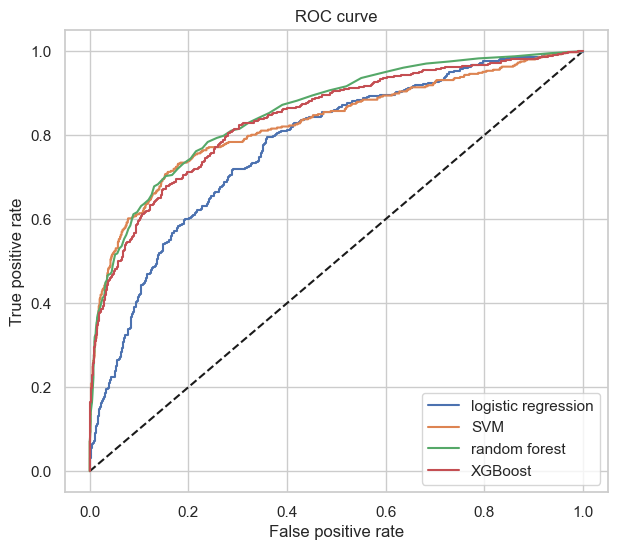

In [39]:


plt.figure(figsize=(7, 6))

# logistic regression
y_pred_lr = logit_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='logistic regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')


# SVC
y_pred_svc = svm_model.predict_proba(X_test)[:, 1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_svc)

plt.plot(fpr_svc, tpr_svc, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')


# random forest
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.plot(fpr_rf, tpr_rf, label='random forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')



# XGBoost
y_pred_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)

plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')





print()


print("AUC score for logistic regression: " + str(metrics.auc(fpr_lr,tpr_lr)))
print("AUC score for SVM: " + str(metrics.auc(fpr_svc,tpr_svc)))
print("AUC score for random forest: " + str(metrics.auc(fpr_rf,tpr_rf)))
print("AUC score for XGBoost: " + str(metrics.auc(fpr_xgb,tpr_xgb)))

## Precision Recall Curve

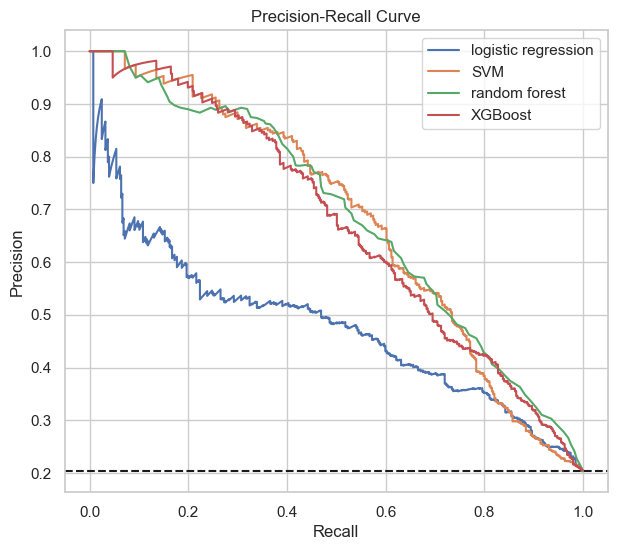


AUC score for logistic regression: 0.477858389035527
AUC score for SVM: 0.6792321664371811
AUC score for random forest: 0.6839017853697219
AUC score for XGBoost: 0.6687100481248341


In [40]:


plt.figure(figsize=(7, 6))
    
# logistic regression
y_pred_lr = logit_model.predict_proba(X_test)[:, 1]

pre_lr, rec_lr, _ = precision_recall_curve(y_test, y_pred_lr)

plt.plot(rec_lr, pre_lr, label='logistic regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')



# SVC
y_pred_svc = svm_model.predict_proba(X_test)[:, 1]
pre_svc, rec_svc, _ = precision_recall_curve(y_test, y_pred_svc)

plt.plot(rec_svc, pre_svc, label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')



# random forest
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]
pre_rf, rec_rf, _ = precision_recall_curve(y_test, y_pred_rf)

plt.plot(rec_rf, pre_rf, label='random forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')



# XGBoost
y_pred_xgb = xgb_model.predict_proba(X_test)[:, 1]
pre_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_pred_xgb)

plt.plot(rec_xgb, pre_xgb, label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.legend(loc='best')



neg=y_test.value_counts().iloc[0]
pos=y_test.value_counts().iloc[1]

plt.axhline(y=pos/(pos+neg), color='k', linestyle='--')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

print()


print("AUC score for logistic regression: " + str(metrics.auc(rec_lr,pre_lr)))
print("AUC score for SVM: " + str(metrics.auc(rec_svc,pre_svc)))
print("AUC score for random forest: " + str(metrics.auc(rec_rf,pre_rf)))
print("AUC score for XGBoost: " + str(metrics.auc(rec_xgb,pre_xgb)))